In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
orders = pd.read_csv('/content/drive/MyDrive/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/products.csv')
order_products = pd.read_csv('/content/drive/MyDrive/order_products__train.csv')
# Merging the dataframes to get dataset of orders with product names
merged_data = pd.merge(pd.merge(order_products, products, on='product_id'), orders, on='order_id')
# Check for missing values
print(merged_data.isnull().sum())
# Drop duplicates
merged_data.drop_duplicates(inplace=True)

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [ ]:
merged_data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,4,10,9.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Top 50 most frequently ordered products
top_N_products = merged_data['product_name'].value_counts().head(50).index

# Sampling of 10 percent
sampled_users = merged_data['user_id'].drop_duplicates().sample(frac=0.1)

# Contains the top 50 products and 10 percent sampled users
reduced_data = merged_data[merged_data['product_name'].isin(top_N_products) &
                           merged_data['user_id'].isin(sampled_users)]

In [ ]:
reduced_data.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
80,2853065,13176,20,0,Bag of Organic Bananas,24,4,145852,train,7,1,19,15.0
86,2853065,39877,22,0,Organic Granny Smith Apple,24,4,145852,train,7,1,19,15.0
88,2853065,8518,19,0,Organic Red Onion,83,4,145852,train,7,1,19,15.0
90,2853065,4605,8,1,Yellow Onions,83,4,145852,train,7,1,19,15.0
165,153973,26209,1,1,Limes,24,4,79511,train,20,3,7,19.0
284,338460,49235,8,0,Organic Half & Half,53,16,36560,train,12,1,14,30.0
290,338460,43352,25,1,Raspberries,32,4,36560,train,12,1,14,30.0
341,404233,42265,3,1,Organic Baby Carrots,123,4,121484,train,8,1,17,30.0
445,513953,40706,20,0,Organic Grape Tomatoes,123,4,46696,train,13,0,10,30.0
446,513953,24964,26,1,Organic Garlic,83,4,46696,train,13,0,10,30.0


In [ ]:
# Pivot table with the reduced data
user_prod_matrix = reduced_data.pivot_table(index='user_id', columns='product_name',
                                            values='reordered', fill_value=0, aggfunc='max')
user_prod_matrix

product_name,Asparagus,Bag of Organic Bananas,Banana,Broccoli Crown,Carrots,Cucumber Kirby,Fresh Cauliflower,Green Bell Pepper,Half & Half,Honeycrisp Apple,...,Organic Yellow Onion,Organic Zucchini,Original Hummus,Raspberries,Red Peppers,Seedless Red Grapes,Small Hass Avocado,Sparkling Water Grapefruit,Strawberries,Yellow Onions
user_id,,,,,,,,,,,,,,,,,,,,,
67,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206035,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
206040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206057,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sparse matrix
user_prod_sparse_matrix = csr_matrix(user_prod_matrix)
user_prod_sparse_matrix

<8155x50 sparse matrix of type '<class 'numpy.int64'>'
	with 16519 stored elements in Compressed Sparse Row format>

In [ ]:
# cosine similarity matrix for user similarity
user_similarity = cosine_similarity(user_prod_sparse_matrix)
user_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
user_similarity_df = pd.DataFrame(user_similarity, index=user_prod_matrix.index, columns=user_prod_matrix.index)
user_similarity_df

user_id,67,130,146,147,191,206,264,309,375,406,...,205950,205971,205972,206007,206033,206035,206040,206057,206071,206132
user_id,,,,,,,,,,,,,,,,,,,,,
67,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.707107,0.000000,0.00000,0.000000,0.00000,0.0,0.707107,0.0
130,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.288675,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.57735,0.204124,0.57735,0.0,0.000000,0.0
146,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0
147,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.353553,0.00000,0.0,0.000000,0.0
191,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206035,0.000000,0.204124,0.0,0.353553,0.0,0.5,0.176777,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.176777,0.00000,1.000000,0.00000,0.0,0.000000,0.0
206040,0.000000,0.577350,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.00000,0.0,0.000000,0.0
206057,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,1.0,0.000000,0.0


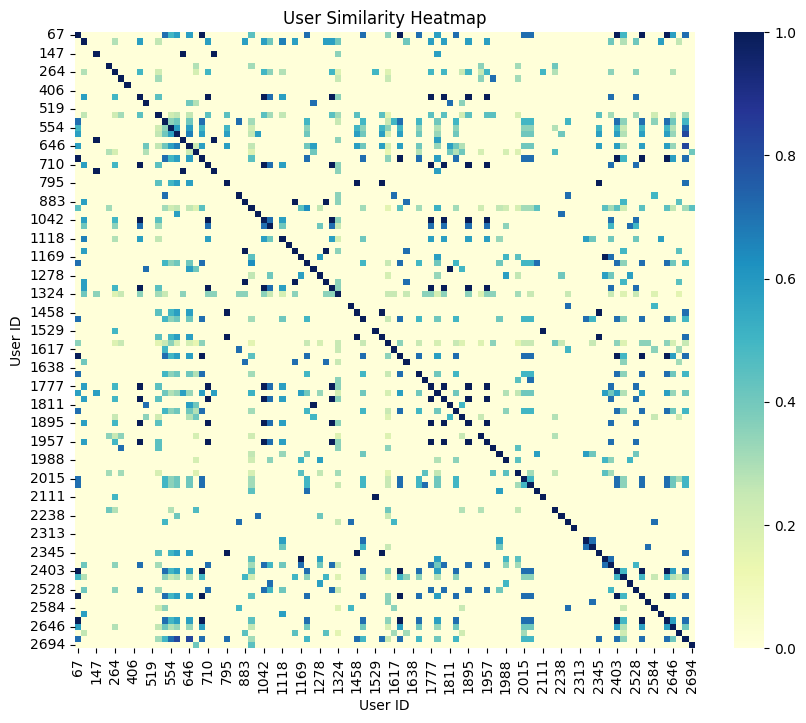

In [ ]:
# Visualize user similarity using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:100, :100], cmap='YlGnBu')
plt.title('User Similarity Heatmap')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

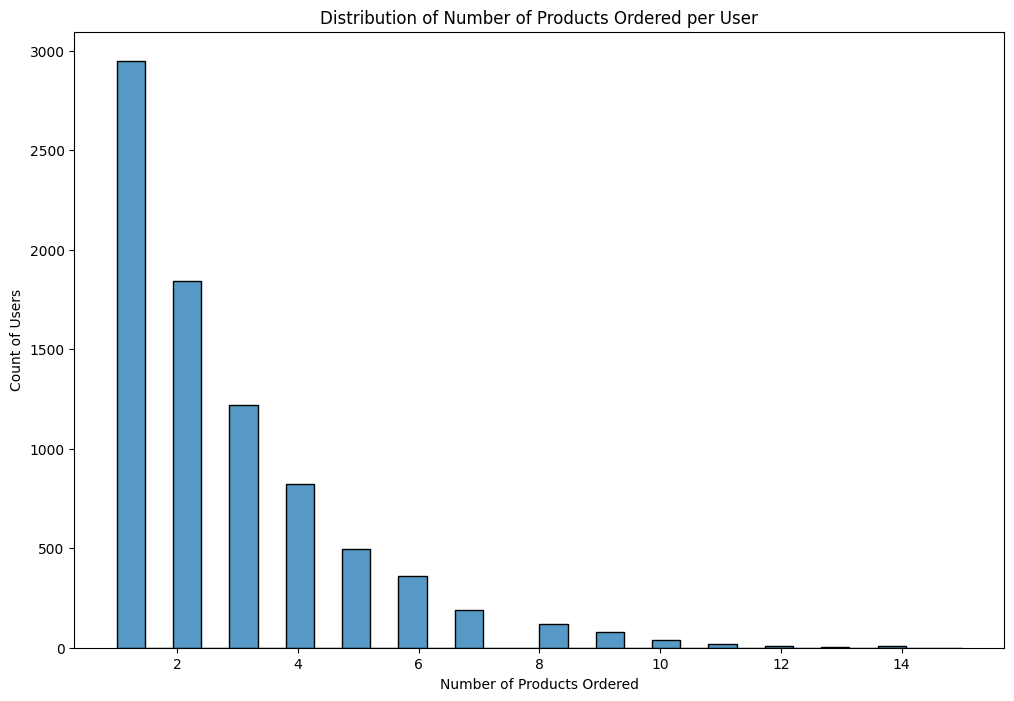

In [ ]:
# Calculate the total number of products ordered by each user
user_order_counts = reduced_data.groupby('user_id')['product_name'].count()
plt.figure(figsize=(12, 8))
sns.histplot(user_order_counts, bins=30, kde=False)
plt.title('Distribution of Number of Products Ordered per User')
plt.xlabel('Number of Products Ordered')
plt.ylabel('Count of Users')
plt.show()

In [ ]:
# Recommmender System
def recommend_products(user_id, user_similarity_df, user_prod_matrix, top_n=5):
    # Top users with the highest scores to the user_id
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).head(top_n+1).index
    # Products bought by similar users
    similar_users_prod = user_prod_matrix.loc[similar_users]
    # Products not bought by the user
    recommended_prods = similar_users_prod.mean(axis=0).sort_values(ascending=False).head(top_n)
    # Filter out the products that the user has already bought
    bought_prods = user_prod_matrix.loc[user_id]
    recommended_prods = recommended_prods[~recommended_prods.index.isin(bought_prods[bought_prods > 0].index)]
    return recommended_prods.index.tolist()

# Example: Recommend products for user_id 2951
print(recommend_products(1988, user_similarity_df, user_prod_matrix, top_n=5))


['Asparagus']


In [ ]:
# Example: Recommend products for user_id 130
print(recommend_products(1957, user_similarity_df, user_prod_matrix, top_n=5))

['Asparagus', 'Organic Tomato Cluster', 'Organic Hass Avocado', 'Organic Italian Parsley Bunch']


In [ ]:
# Create the item-user matrix
item_user_matrix = reduced_data.pivot_table(index='product_name', columns='user_id', values='reordered', fill_value=0, aggfunc='max')
item_user_matrix

user_id,67,130,146,147,191,206,264,309,375,406,...,205950,205971,205972,206007,206033,206035,206040,206057,206071,206132
product_name,,,,,,,,,,,,,,,,,,,,,
Asparagus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Bag of Organic Bananas,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
Banana,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Broccoli Crown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Carrots,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cucumber Kirby,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Fresh Cauliflower,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Green Bell Pepper,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
Half & Half,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Convert to sparse matrix
item_user_sparse_matrix = csr_matrix(item_user_matrix)

# Compute cosine similarity between items
item_similarity = cosine_similarity(item_user_sparse_matrix)

# Creating a DataFrame for item similarity for easier access
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

In [ ]:
item_similarity_df.head()

product_name,Asparagus,Bag of Organic Bananas,Banana,Broccoli Crown,Carrots,Cucumber Kirby,Fresh Cauliflower,Green Bell Pepper,Half & Half,Honeycrisp Apple,...,Organic Yellow Onion,Organic Zucchini,Original Hummus,Raspberries,Red Peppers,Seedless Red Grapes,Small Hass Avocado,Sparkling Water Grapefruit,Strawberries,Yellow Onions
product_name,,,,,,,,,,,,,,,,,,,,,
Asparagus,1.000000,0.060515,0.072575,0.097889,0.035733,0.042280,0.077531,0.056324,0.019383,0.029058,...,0.065473,0.122922,0.013406,0.030439,0.074769,0.042373,0.049504,0.028110,0.042953,0.045389
Bag of Organic Bananas,0.060515,1.000000,0.002015,0.040769,0.053151,0.033017,0.076691,0.068242,0.068618,0.067427,...,0.143918,0.107045,0.087475,0.072444,0.043596,0.094656,0.052482,0.063556,0.060057,0.037808
Banana,0.072575,0.002015,1.000000,0.101105,0.071279,0.095736,0.056690,0.069565,0.065834,0.131594,...,0.060399,0.078722,0.080950,0.052514,0.092175,0.101761,0.101904,0.078806,0.155152,0.098104
Broccoli Crown,0.097889,0.040769,0.101105,1.000000,0.024616,0.050972,0.017526,0.067903,0.017526,0.045041,...,0.061392,0.071851,0.032324,0.026212,0.036056,0.055728,0.043405,0.024207,0.044385,0.054720
Carrots,0.035733,0.053151,0.071279,0.024616,1.000000,0.031565,0.023153,0.030581,0.023153,0.019834,...,0.069518,0.066741,0.048041,0.005194,0.035724,0.018405,0.059133,0.028781,0.021989,0.073932


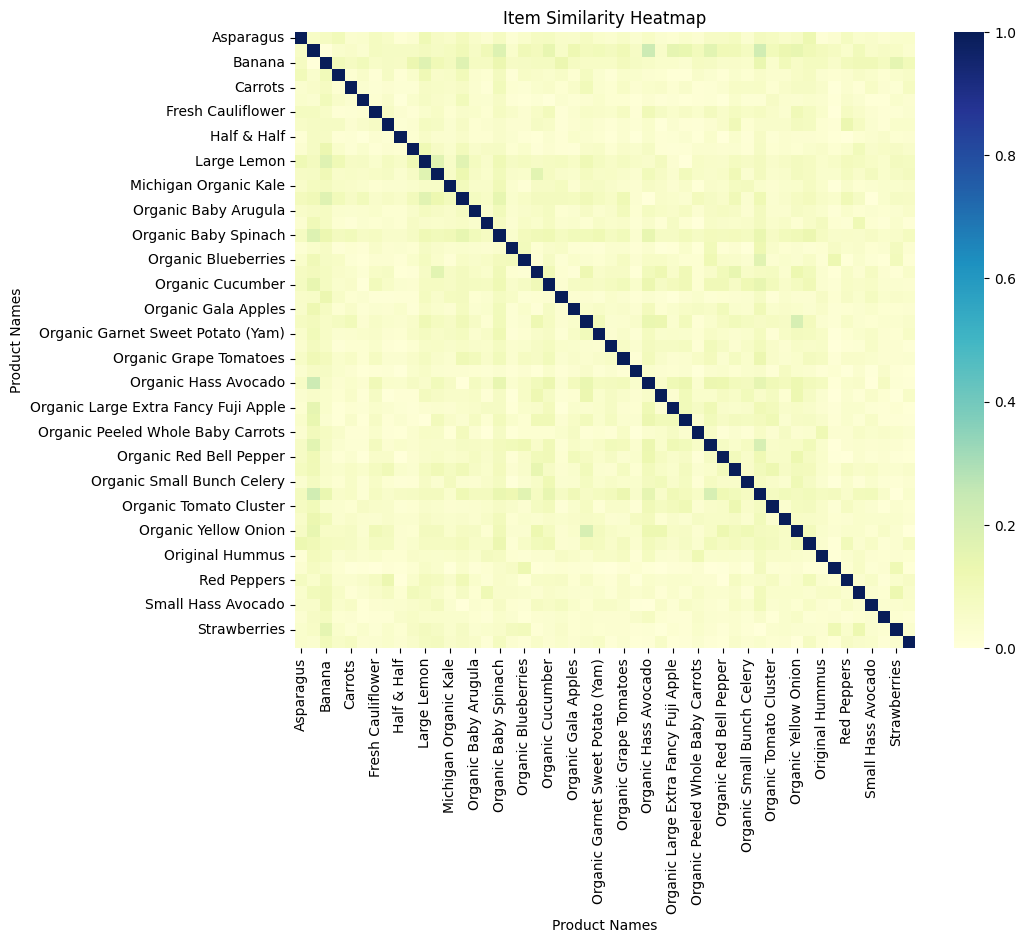

In [ ]:
# Visualize item similarity using a heatmap for the top 50 items
plt.figure(figsize=(10, 8))
sns.heatmap(item_similarity_df.iloc[:50, :50], cmap='YlGnBu')
plt.title('Item Similarity Heatmap')
plt.xlabel('Product Names')
plt.ylabel('Product Names')
plt.show()

In [ ]:
def recommend_items(user_id, item_similarity_df, user_data, top_n=5):
    # Identify products that this user has bought
    bought_items = user_data[user_data['user_id'] == user_id]['product_name'].unique()

    # Filter out any items that aren't in the item similarity DataFrame
    bought_items = [item for item in bought_items if item in item_similarity_df.index]

    # List to collect similar item scores
    scores_list = []

    for item in bought_items:
        # Get the row corresponding to the item and remove already bought items
        similar_items = item_similarity_df.loc[item].drop(labels=bought_items, errors='ignore')

        # Collect the scores
        scores_list.append(similar_items)

    # Concatenate all series into one Series and sum scores from all bought items
    if scores_list:
        scores = pd.concat(scores_list, axis=0)
        final_scores = scores.groupby(scores.index).sum()
        # Sort the scores in descending order and take the top_n items
        recommended_items = final_scores.sort_values(ascending=False).head(top_n)
        return recommended_items.index.tolist()
    else:
        return []

# Example: Recommend items for user_id 264
print(recommend_items(264, item_similarity_df, reduced_data, top_n=5))
# Example: Recommend items for user_id 406
print(recommend_items(406, item_similarity_df, reduced_data, top_n=5))

['Large Lemon', 'Organic Baby Spinach', 'Organic Strawberries', 'Honeycrisp Apple', 'Limes']
['Organic Yellow Onion', 'Organic Red Onion', 'Organic Cilantro', 'Large Lemon', 'Red Peppers']
